# 淘宝用户购物行为数据可视化分析

为了完成淘宝用户购物行为数据的可视化分析，首先需要从数据源收集数据，然后进行数据清洗，去除异常值和缺失值等。pandas模块可以读取CSV文件并提供数据处理的功能，例如删除包含空值的行和重复行。当然，在实际应用中，还需要根据数据的特点和需求选择适当的数据处理方法。

本次分析数据有5个字段，其分别表示用户id、商品id、用户对商品的行为类型、商品分类以及精确到小时级别的行为时间。具体说明如下：

| 字段              | 字段说明            | 提取说明                             | 
|-----------------|-----------------|----------------------------------|
|  user_id        |  用户标识           |  抽样和字段脱敏                      |
|  item_id        |  商品标识           |  字段脱敏                           |
|  behavior_type  |  用户对商品的行为类型     |  包括浏览、收藏、加购物车、购买，对应取值分别是1、2、3、4  |
| item_category   | 商品分类标识          | 字段脱敏                             |
| time            | 行为时间            | 精确到小时级别                          |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.font_manager import FontProperties

# 设置中文字体为 SimHei，并解决负号显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 显示负号


In [2]:
# !pip install python-calamine

In [3]:
data = pd.read_csv('user_action.csv')
data

,user_id,item_id,behavior_type,item_category,time
0,98047837,232431562,1,4245,2014-12-06 02
1,97726136,383583590,1,5894,2014-12-09 20
2,98607707,64749712,1,2883,2014-12-18 11
3,98662432,320593836,1,6562,2014-12-06 10
4,98145908,290208520,1,13926,2014-12-16 21
...,...,...,...,...,...
12256901,93812622,378365755,1,11,2014-12-13 21
12256902,93812622,177724753,1,12311,2014-12-14 21
12256903,93812622,234391443,1,8765,2014-12-11 16
12256904,93812622,26452000,1,7951,2014-12-08 22


In [4]:
data.info()
display(data.describe())
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12256906 entries, 0 to 12256905
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        int64 
 1   item_id        int64 
 2   behavior_type  int64 
 3   item_category  int64 
 4   time           object
dtypes: int64(4), object(1)
memory usage: 467.6+ MB


,user_id,item_id,behavior_type,item_category
count,1.225691e+07,1.225691e+07,1.225691e+07,1.225691e+07
mean,7.170732e+07,2.023084e+08,1.105271e+00,6.846162e+03
std,4.122920e+07,1.167397e+08,4.572662e-01,3.809922e+03
min,4.913000e+03,6.400000e+01,1.000000e+00,2.000000e+00
25%,3.584965e+07,1.014130e+08,1.000000e+00,3.721000e+03
50%,7.292804e+07,2.021359e+08,1.000000e+00,6.209000e+03
75%,1.073774e+08,3.035405e+08,1.000000e+00,1.029000e+04
max,1.424559e+08,4.045625e+08,4.000000e+00,1.408000e+04


user_id          0
item_id          0
behavior_type    0
item_category    0
time             0
dtype: int64

In [5]:
data.dtypes

user_id           int64
item_id           int64
behavior_type     int64
item_category     int64
time             object
dtype: object

1200w条数据，数据不包含缺失值

查看数据整体规模（用户数量，商品数量等）

In [6]:
#切割时间
data['date'] = data['time'].map(lambda x: x.split(' ')[0])
data['hour'] = data['time'].map(lambda x: x.split(' ')[1].split(':')[0])
data.head()

,user_id,item_id,behavior_type,item_category,time,date,hour
0,98047837,232431562,1,4245,2014-12-06 02,2014-12-06,02
1,97726136,383583590,1,5894,2014-12-09 20,2014-12-09,20
2,98607707,64749712,1,2883,2014-12-18 11,2014-12-18,11
3,98662432,320593836,1,6562,2014-12-06 10,2014-12-06,10
4,98145908,290208520,1,13926,2014-12-16 21,2014-12-16,21


In [7]:
data['date']=pd.to_datetime(data['date'],format='%Y-%m-%d')
data['time'] = pd.to_datetime(data['time'], format='%Y-%m-%d %H')

In [8]:
data.dtypes

user_id                   int64
item_id                   int64
behavior_type             int64
item_category             int64
time             datetime64[ns]
date             datetime64[ns]
hour                     object
dtype: object

In [9]:
data.head()

,user_id,item_id,behavior_type,item_category,time,date,hour
0,98047837,232431562,1,4245,2014-12-06 02:00:00,2014-12-06,02
1,97726136,383583590,1,5894,2014-12-09 20:00:00,2014-12-09,20
2,98607707,64749712,1,2883,2014-12-18 11:00:00,2014-12-18,11
3,98662432,320593836,1,6562,2014-12-06 10:00:00,2014-12-06,10
4,98145908,290208520,1,13926,2014-12-16 21:00:00,2014-12-16,21


In [10]:

print("数据总览：",data.shape)
print("用户数：",data['user_id'].nunique())
print("商品数：",len(set(data['item_id'])))
print("商品类别数：",len(set(data['item_category'])))
print(f"时间跨度:{(data['time'].min())}~{(data['time'].max())}",data['time'].max()-data['time'].min())

数据总览： (12256906, 7)
用户数： 10000
商品数： 2876947
商品类别数： 8916
时间跨度:2014-11-18 00:00:00~2014-12-18 23:00:00 30 days 23:00:00


可知，该数据统计的是10000名用户在2014-11-18至2014-12-18为期30天的商品购买情况。共计包含1225.69w条消费记录，商品总数超过28万，类别数近9000.数据样本量足以支撑后续的数据挖掘分析与可视化。

# 二.数据分析与可视化

## 1.流量分析


使用PV（页面访问量）和UV（独立访客数）指标，分析访问量和访问用户的趋势和规律。用可视化工具绘制相应的图表更好地展示数据，进而找出高峰期及用户访问偏好。同时，我们发现提供的数据有“双十二”这一特殊日期，因此可针对12月12日这一天进行具体分析，以便更好地规划营销活动。

- PV（页面访问量）即Page View，用户每次对网站的访问均被记录，用户对同一页面的多次访问，是访问量的累计。
- UV（独立访客数）即Unique Visitor，访问网站的一台电脑客户端为一个访客，根据IP地址来区分访客数。

### 1.1 每天的PV和UV数据分析

In [11]:
#按日期分组，统计每天的用户浏览量
pv_daily = data.groupby('date')['user_id'].count().reset_index().rename(columns={'user_id': 'pv_daily'})

#计算pv占比
pv_daily['pv_ratio'] = pv_daily['pv_daily'] / pv_daily['pv_daily'].sum()
pv_daily.head()

,date,pv_daily,pv_ratio
0,2014-11-18,366701,0.029918
1,2014-11-19,358823,0.029275
2,2014-11-20,353429,0.028835
3,2014-11-21,333104,0.027177
4,2014-11-22,361355,0.029482


In [12]:
#计算每天的UV，nunique(user_id)
uv_daily = data.groupby('date')['user_id'].apply(lambda x: len(x.unique())).reset_index().rename(columns={'user_id':'uv_daily'})

#计算UV占比
uv_daily['uv_ratio'] = uv_daily['uv_daily'] / uv_daily['uv_daily'].sum()
uv_daily.head()

,date,uv_daily,uv_ratio
0,2014-11-18,6343,0.031351
1,2014-11-19,6420,0.031731
2,2014-11-20,6333,0.031301
3,2014-11-21,6276,0.031020
4,2014-11-22,6187,0.030580


对于pv和uv作折线图，可视化结果

Text(0.5, 1.0, 'uv_daily')

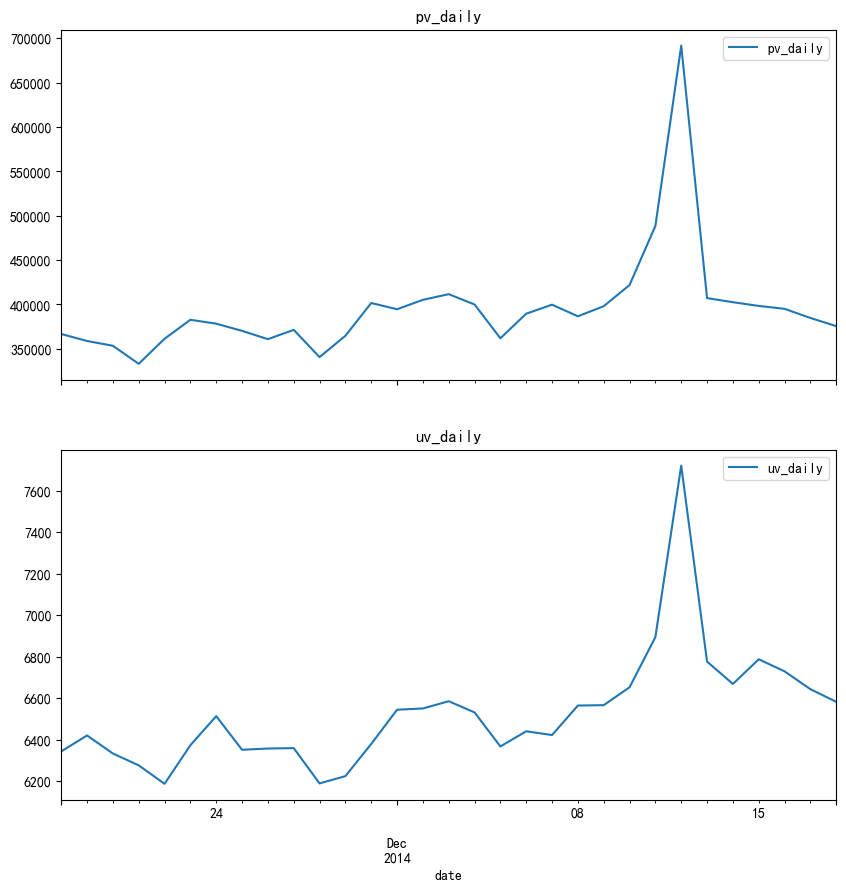

In [13]:
fig,axes = plt.subplots(2,1,figsize=(10,10),sharex=True )
pv_daily.plot(x = 'date',y = 'pv_daily',ax= axes[0])
uv_daily.plot(x = 'date',y = 'uv_daily',ax= axes[1])
axes[0].set_title('pv_daily')
axes[1].set_title('uv_daily')


由折线图可见，pv_daily与uv_daily的整体波动趋势大致相同，且都在12.12日达到最高峰，考虑到双十二促销活动，商家应推出相应的促销活动以吸引用户。

In [14]:
#查看uv，pv前五的日期
print(pv_daily.sort_values(by = 'pv_daily',ascending=False)[:5])
print(uv_daily.sort_values(by = 'uv_daily',ascending=False)[:5])

         date  pv_daily  pv_ratio
24 2014-12-12    691712  0.056434
23 2014-12-11    488508  0.039856
22 2014-12-10    421910  0.034422
15 2014-12-03    411606  0.033582
25 2014-12-13    407160  0.033219
         date  uv_daily  uv_ratio
24 2014-12-12      7720  0.038157
23 2014-12-11      6894  0.034074
27 2014-12-15      6787  0.033545
25 2014-12-13      6776  0.033491
28 2014-12-16      6729  0.033259


### 1.2 每小时pv与uv分析  
查看用户在各时段的pv与uv分布情况。

In [15]:
data.head()

,user_id,item_id,behavior_type,item_category,time,date,hour
0,98047837,232431562,1,4245,2014-12-06 02:00:00,2014-12-06,02
1,97726136,383583590,1,5894,2014-12-09 20:00:00,2014-12-09,20
2,98607707,64749712,1,2883,2014-12-18 11:00:00,2014-12-18,11
3,98662432,320593836,1,6562,2014-12-06 10:00:00,2014-12-06,10
4,98145908,290208520,1,13926,2014-12-16 21:00:00,2014-12-16,21


In [16]:
pv_hour = data.groupby('hour')['user_id'].count().reset_index().rename(columns={'user_id':'pv_hour'})
#计算每小时pv占比
pv_hour['pv_hour_ratio'] = pv_hour['pv_hour']/pv_hour['pv_hour'].sum()
pv_hour.head()


,hour,pv_hour,pv_hour_ratio
0,00,517404,0.042213
1,01,267682,0.021839
2,02,147090,0.012001
3,03,98516,0.008038
4,04,80487,0.006567


In [17]:
uv_hour = data.groupby('hour')['user_id'].apply(lambda x: x.nunique()).reset_index().rename(columns={'user_id': 'uv_hour'})
#计算每小时uv占比
uv_hour['uv_hour_ratio'] = uv_hour['uv_hour']/uv_hour['uv_hour'].sum()

uv_hour.head()

,hour,uv_hour,uv_hour_ratio
0,00,5786,0.036480
1,01,3780,0.023832
2,02,2532,0.015964
3,03,1937,0.012213
4,04,1765,0.011128


Text(0.5, 1.0, 'uv_hour')

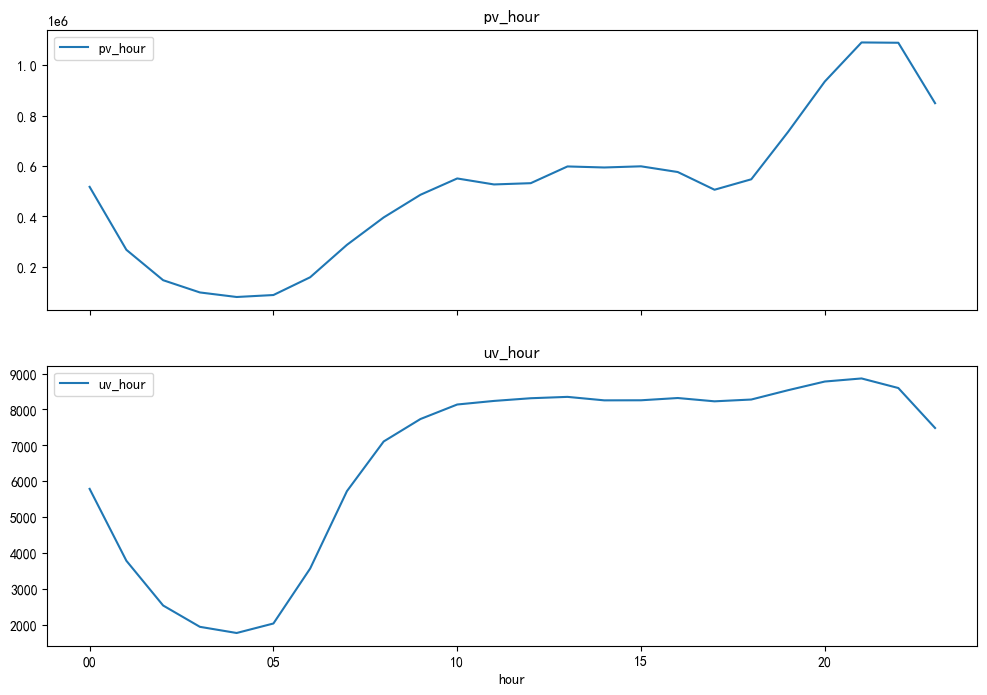

In [18]:
#折线图结果可视化
fig,axes = plt.subplots(2,1,figsize=(12,8),sharex=True)
pv_hour.plot(x = 'hour',y = 'pv_hour',ax=axes[0],label='pv_hour')
uv_hour.plot(x = 'hour',y = 'uv_hour',ax=axes[1],label='uv_hour')
axes[0].set_title('pv_hour')
axes[1].set_title('uv_hour')

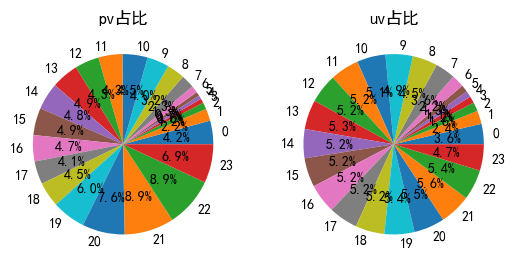

In [19]:
#饼图绘制pv占比与uv占比
plt.Figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.pie(pv_hour['pv_hour_ratio'],labels=pv_hour.index,autopct='%1.1f%%' )
plt.title('pv占比')
plt.subplot(1,2,2)
plt.pie(uv_hour['uv_hour_ratio'],labels=uv_hour.index,autopct='%1.1f%%' )
plt.title('uv占比')
plt.show()

从折线图可见：
- pv值在18点之后开始出现明显上升趋势，高峰期为21-22点，可能原因是网购主要群体大多为公司白领或者学生阶级，在完成一天的工作和学习之后，开始使用淘宝进行购物。  
- uv值相对稳定，在22-6点出现明显低估，可能原因是在这个时间段，大部分人都在睡觉；而在8-22点的时间段，uv值变化波动不明显，可能原因是用户一旦处于一个短暂的空闲时间（如工作休息时间，学生课间时间段），就会打开淘宝进行短暂的浏览。

### 1.2.1 12月12日每小时的pv与uv分析

In [20]:
data_1212 = data[data['date'] == '2014-12-12']
print(data_1212.dtypes)
data_1212.head() 

user_id                   int64
item_id                   int64
behavior_type             int64
item_category             int64
time             datetime64[ns]
date             datetime64[ns]
hour                     object
dtype: object


,user_id,item_id,behavior_type,item_category,time,date,hour
13,101260672,212072908,1,10984,2014-12-12 11:00:00,2014-12-12,11
20,101781721,19349307,1,1863,2014-12-12 12:00:00,2014-12-12,12
54,100684618,94486594,1,10984,2014-12-12 23:00:00,2014-12-12,23
69,103802946,190848347,1,5232,2014-12-12 22:00:00,2014-12-12,22
95,104811265,354843735,1,10585,2014-12-12 21:00:00,2014-12-12,21


In [21]:
#统计双十二期间每小时的pv与uv值
pv_hour_1212 = data_1212.groupby(['hour'])['user_id'].count().reset_index().rename(columns={'user_id':'pv_hour_1212'})
#计算每小时pv占比
pv_hour_1212['pv_hour_1212_ratio'] = pv_hour_1212['pv_hour_1212']/pv_hour_1212['pv_hour_1212'].sum()

uv_hour_1212 = data_1212.groupby(['hour'])['user_id'].nunique().reset_index().rename(columns={'user_id':'uv_hour_1212'})
#计算每小时uv占比
uv_hour_1212['uv_hour_1212_ratio'] = uv_hour_1212['uv_hour_1212']/uv_hour_1212['uv_hour_1212'].sum()
display(pv_hour_1212.head(),uv_hour_1212.head())

,hour,pv_hour_1212,pv_hour_1212_ratio
0,00,50030,0.072328
1,01,22761,0.032905
2,02,11754,0.016993
3,03,6173,0.008924
4,04,5168,0.007471


,hour,uv_hour_1212,uv_hour_1212_ratio
0,00,1569,0.045201
1,01,811,0.023364
2,02,411,0.011840
3,03,255,0.007346
4,04,211,0.006079


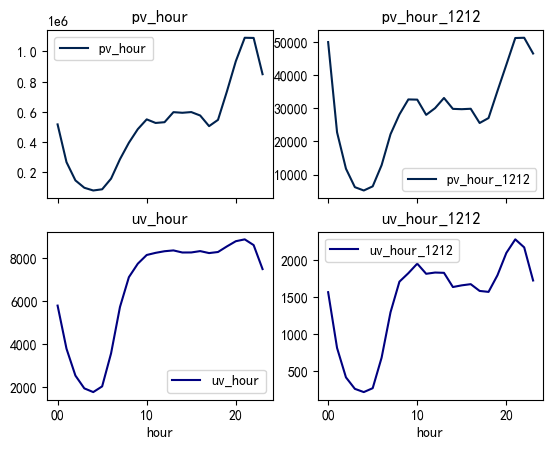

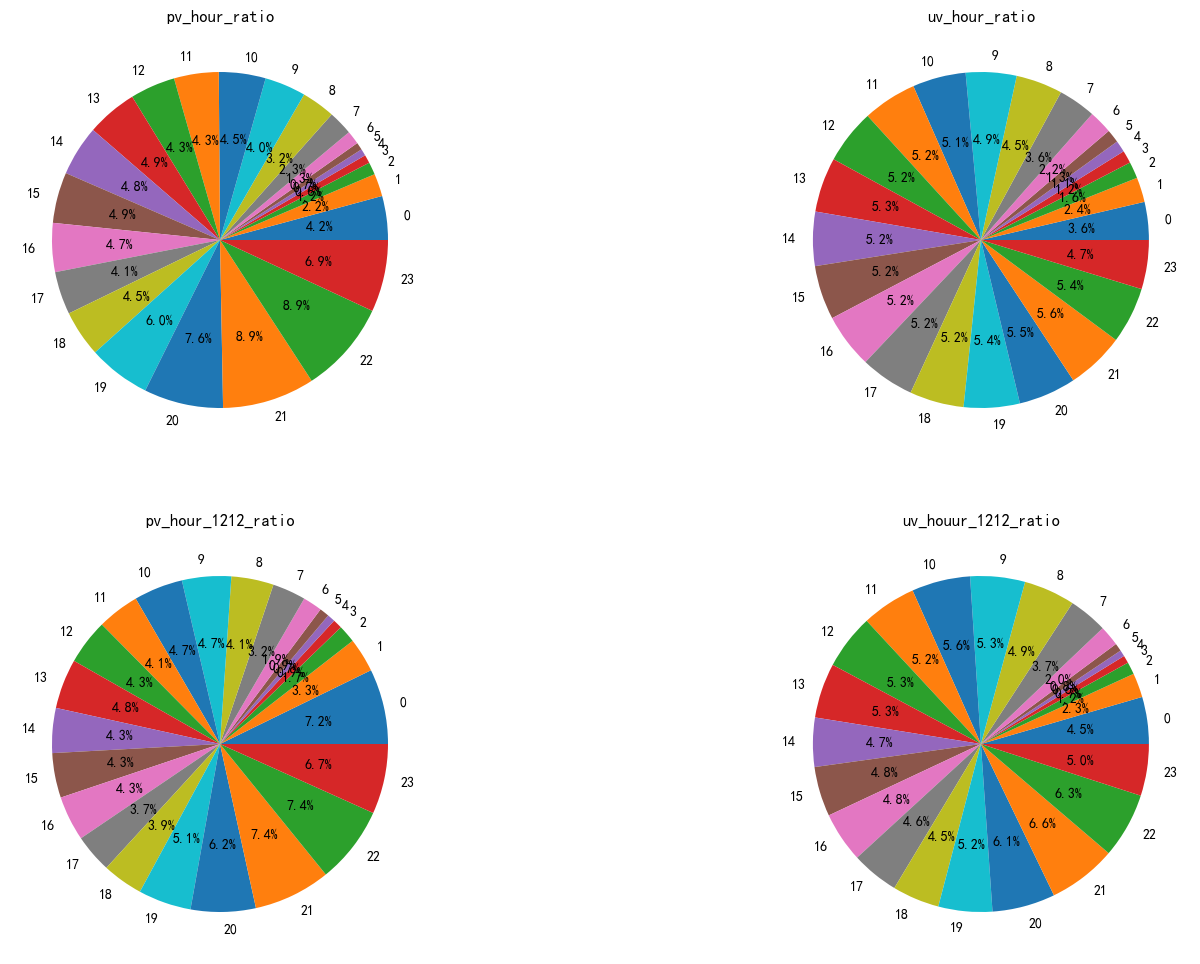

In [22]:
#可视化(将12月12日的数据与30天的总体数据进行比较分析)
#pv折线图
fig,axes = plt.subplots(2,2,sharex=True,sharey=False)
pv_hour.plot(x= 'hour',y = 'pv_hour',ax=axes[0,0],kind='line',colormap='cividis')
pv_hour_1212.plot(x = 'hour',y = 'pv_hour_1212',ax = axes[0,1],kind='line',colormap='cividis')
axes[0,0].set_title('pv_hour')
axes[0,1].set_title('pv_hour_1212')

#uv折线图
uv_hour.plot(x= 'hour',y = 'uv_hour',ax = axes[1,0],kind = 'line',colormap = 'jet')
uv_hour_1212.plot(x='hour',y = 'uv_hour_1212',ax = axes[1,1],kind = 'line',colormap = 'jet')
axes[1,0].set_title('uv_hour')
axes[1,1].set_title('uv_hour_1212')

#饼图绘制
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
plt.pie(pv_hour['pv_hour_ratio'],labels=pv_hour.index,autopct='%1.1f%%')
plt.title('pv_hour_ratio')
plt.subplot(2,2,2)
plt.pie(uv_hour['uv_hour_ratio'],labels=uv_hour.index,autopct='%1.1f%%')
plt.title('uv_hour_ratio')
plt.subplot(2,2,3)
plt.pie(pv_hour_1212['pv_hour_1212_ratio'],labels=pv_hour_1212.index,autopct='%1.1f%%')
plt.title('pv_hour_1212_ratio')
plt.subplot(2,2,4)
plt.pie(uv_hour_1212['uv_hour_1212_ratio'],labels=uv_hour_1212.index,autopct = '%1.1f%%')
plt.title('uv_houur_1212_ratio')

plt.show()

可得到如下结论：
- 双十二当天，pv变化趋势与30天的总体情况大致相同，单双十二期间波动性更大。
- 结合饼图看，双十二期间整点的pv值更为平均，可能原因是双十二促销期间由整点“红包雨“的活动
* 查看UV相关的饼图，UV变化趋势与一个月内的UV变化趋势基本一致，但双十二UV在20~0点的占比明显高于整月的。
* 进一步分析UV变化趋势有所不同，可以看到双十二当天UV曲线在8-23点明显不平滑，推测此时用户使用淘宝的目的性更明确，可能原因是整点有活动。在21点附近双十二当日的UV出现了小高峰，推测双十二活动当天用户的购物欲望较强。

### 1.3 用户行为分析

#### 1.3.1 每天的用户行为分析
淘宝用户广泛，且不同用户的购物行为和使用习惯差异性较大。比如有的用户习惯先加购物车，货比三家且多次思考后再购买、有的用户习惯打开链接直接购买等等。由此可见，不同用户其使用习惯以及购买偏好也不同，因此可对用户浏览、收藏、加购物车、购买四种行为的PV分析（流量趋势）进行进一步分析。



In [23]:
data.head()


,user_id,item_id,behavior_type,item_category,time,date,hour
0,98047837,232431562,1,4245,2014-12-06 02:00:00,2014-12-06,02
1,97726136,383583590,1,5894,2014-12-09 20:00:00,2014-12-09,20
2,98607707,64749712,1,2883,2014-12-18 11:00:00,2014-12-18,11
3,98662432,320593836,1,6562,2014-12-06 10:00:00,2014-12-06,10
4,98145908,290208520,1,13926,2014-12-16 21:00:00,2014-12-16,21


<Axes: xlabel='behavior_type'>

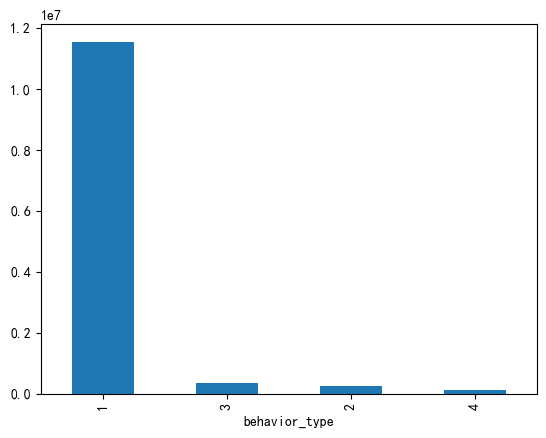

In [24]:
#不同用户行为的合计数目
data['behavior_type'].value_counts()
#绘制柱状图
data['behavior_type'].value_counts().plot(kind='bar')

In [25]:
#基于behavior_type与date进行分组分析
# 浏览、收藏、加购物车、购买四种行为，分别用数字1、2、3、4表示
pv_behavior_day = data.groupby(['behavior_type','date'])['user_id'].count().reset_index().rename(columns = {'user_id':'pv_behavior_day'})
pv_behavior_day

,behavior_type,date,pv_behavior_day
0,1,2014-11-18,345855
1,1,2014-11-19,337870
2,1,2014-11-20,332792
3,1,2014-11-21,314572
4,1,2014-11-22,340563
...,...,...,...
119,4,2014-12-14,3483
120,4,2014-12-15,3764
121,4,2014-12-16,3771
122,4,2014-12-17,3615


Text(0.5, 1.0, 'pv_behavior 2 3 4')

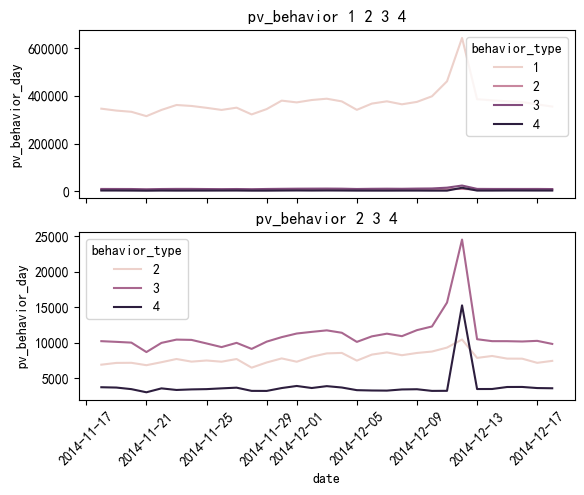

In [26]:
#可视化：浏览、收藏、加购物车、购买四种行为分别用1、2、3、4表示
#绘制折线图初步查看数据
fig,axes = plt.subplots(2,1,sharex=True)
axes[0] = sns.lineplot(x = 'date',y = 'pv_behavior_day',hue = 'behavior_type',data = pv_behavior_day,ax = axes[0])
axes[1] = sns.lineplot(x = 'date',y = 'pv_behavior_day',hue = 'behavior_type',data = pv_behavior_day[pv_behavior_day['behavior_type']!=1],ax = axes[1])
plt.xticks(rotation = 45)
axes[0].set_title('pv_behavior 1 2 3 4')
axes[1].set_title('pv_behavior 2 3 4')

#输出一个月中每种不同行为的pv前五的数据值
# for i in range(1,5):
#     print(pv_behavior[pv_behavior['behavior_type']==i].sort_values('pv_behavior',ascending = False)[:5])



观察趋势图可见，四种用户的变化趋势大致相同。除12月12日以外，其他日期的四种行为波动不大，处于稳定状态。且浏览量远高于其他三种行为。在12月12日极其附近日期，四项购物行为都有了显著提升。因此建议商家在12月12日之前，对用户进行一些优惠活动，以期影响用户对购物的兴趣。同时，由每种购物行为的前五数据来看，每种行为之间差异很大，可以进一步考虑分析各个环节之间的转化率数据，分析其相关原因，以及探讨是否可以采取相关的措施，提高转化率。

### 1.3.2 每小时的用户行为分析

In [27]:
#按照behavior_type与hour进行分组1统计
pv_behavior_hour = data.groupby(['behavior_type','hour'])['user_id'].count().reset_index().rename(columns = {'user_id':'pv_behavior_hour'})
pv_behavior_hour

,behavior_type,hour,pv_behavior_hour
0,1,00,487341
1,1,01,252991
2,1,02,139139
3,1,03,93250
4,1,04,75832
...,...,...,...
91,4,19,6352
92,4,20,7872
93,4,21,8829
94,4,22,8845


    behavior_type hour  pv_behavior_hour
21              1   21           1030483
22              1   22           1027269
20              1   20            885669
23              1   23            797754
19              1   19            696035
    behavior_type hour  pv_behavior_hour
45              2   21             20397
46              2   22             20343
47              2   23             17705
44              2   20             16599
43              2   19             13952
    behavior_type hour  pv_behavior_hour
70              3   22             32504
69              3   21             30469
71              3   23             27434
68              3   20             25021
67              3   19             18853
    behavior_type hour  pv_behavior_hour
94              4   22              8845
93              4   21              8829
92              4   20              7872
85              4   13              7717
82              4   10              7317


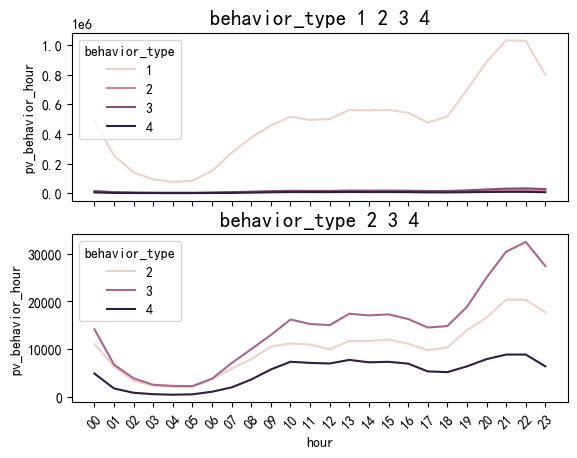

In [28]:
#可视化（浏览，收藏，加购物车，购买四种行为分别用1、2、3、4表示）
#初步查看数据，可见浏览量远远大于其他三种行为，因此，将浏览与其他三种行为分别绘制趋势图
fig,axes = plt.subplots(2,1,sharex=True)
axes[0] = sns.lineplot(x = 'hour',y = 'pv_behavior_hour',hue = 'behavior_type',data = pv_behavior_hour,ax = axes[0])
axes[1] = sns.lineplot(x = 'hour',y = 'pv_behavior_hour',hue = 'behavior_type',data = pv_behavior_hour[pv_behavior_hour.behavior_type != 1],ax = axes[1])
plt.xticks(rotation = 45)
axes[0].set_title('behavior_type 1 2 3 4',fontsize = 15)
axes[1].set_title('behavior_type 2 3 4',fontsize = 15)
plt.show

#输出不同行为峰值的前五时间段
for i in range(1,5):
    print(pv_behavior_hour[pv_behavior_hour.behavior_type == i].sort_values(by= 'pv_behavior_hour',ascending=False)[:5])

每小时的用户行为变化趋势基本一致，在21点作用到达高峰期（可能原因是21点双十二大促销活动正式开启），在0点作用逐渐下降至最低点（双十促销节结束，用户都去睡觉了），符合实际预期。查看24小时内每种用户行为的PV排行榜前五数据，可以发现20-23点是用户购物的高峰期，建议商户在此期间推出相关营销活动，以进一步促进转化率。

#### 1.3.2.1 双十二每小时用户购物行为分析

In [29]:
pv_behavior_1212 = data_1212.groupby(['behavior_type','hour'])['user_id'].count().reset_index().rename(columns = {'user_id':'pv_behavior_1212'})
pv_behavior_1212

,behavior_type,hour,pv_behavior_1212
0,1,00,45229
1,1,01,20988
2,1,02,10896
3,1,03,5762
4,1,04,4827
...,...,...,...
91,4,19,577
92,4,20,643
93,4,21,850
94,4,22,985


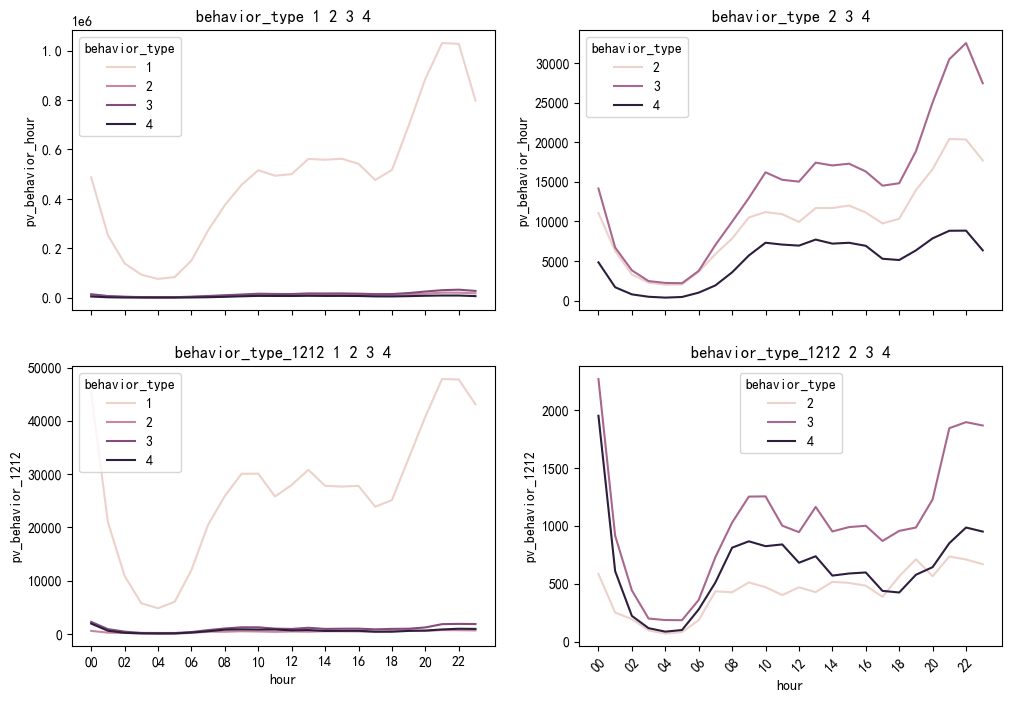

In [30]:
#一个月与一天（12月12日）的不同时间段pv的比对
fig,axes = plt.subplots(2,2,sharex=True,sharey=False,figsize=(12,8))
axes[0,0] = sns.lineplot(x = 'hour',y = 'pv_behavior_hour',hue = 'behavior_type',data = pv_behavior_hour,ax = axes[0,0])
axes[0,1] = sns.lineplot(x = 'hour',y = 'pv_behavior_hour',hue = 'behavior_type',data = pv_behavior_hour[pv_behavior_hour['behavior_type']!=1],ax = axes[0,1])
plt.xticks(np.arange(0,24,2),rotation = 45)
axes[0,0].set_title('behavior_type 1 2 3 4')
axes[0,1].set_title('behavior_type 2 3 4')

#双十二
axes[1,0] = sns.lineplot(x= 'hour',y= 'pv_behavior_1212',hue = 'behavior_type',data = pv_behavior_1212,ax = axes[1,0])
axes[1,1] = sns.lineplot(x = 'hour',y = 'pv_behavior_1212',hue = 'behavior_type',data = pv_behavior_1212[pv_behavior_1212['behavior_type']!= 1],ax = axes[1,1])
plt.xticks(np.arange(0,24,2),rotation = 45)
axes[1,0].set_title('behavior_type_1212 1 2 3 4')
axes[1,1].set_title('behavior_type_1212 2 3 4')
plt.show()

可初步得到以下结论：
- 双十二当天，用户行为浏览的变化趋势与整个数据周期（30天）基本一致，但在双十二当天，0点的浏览量处于最高水平，可能原因是双十二在零点的优惠力度最大，吸引到最多的浏览量。
- 双十二当天，用户的收藏，加购物车，购买曲线更为曲折，可能原因是双十二整点会有相应的优惠活动，用户的购买目标更加明确，只购买目标商品，而不去浏览一些不相干的商品。
- 双十二当天，购买曲线与收藏，加购物车曲线的差别减小，可见，用户在双十二期间购买欲望更大。

## 2 漏斗分析（分析模型：漏斗模型）
漏斗分析是指用户在进行某个特定操作时，从最初的浏览到最终的购买等行为之间的流程和转化率的分析。它可以帮助商家了解用户在购买过程中的转化情况，以便更好地优化营销策略。在本次分析中，我们将通过对用户的浏览、收藏、加购、购买等行为进行漏斗分析，以了解用户在不同阶段的行为转化率和转化情况，找出漏斗中的瓶颈点和优化方向。
### 2.1 一个月转化情况

In [31]:
behavior_type = data['behavior_type'].value_counts()
behavior_type

behavior_type
1    11550581
3      343564
2      242556
4      120205
Name: count, dtype: int64

In [32]:
browse = behavior_type[1]
collect = behavior_type[2]
add_cart = behavior_type[3]
purchase = behavior_type[4]

#计算转化率（浏览-收藏-加购物车-购买）
collect_rate = round((collect/browse*100),2)
add_cart_rate = round((add_cart/collect*100),2)
purchase_rate = round((purchase/add_cart*100),2)

print("转化率：\n浏览-收藏转化率：%s%%\n收藏-加购物车转化率：%s%%\n加购物车-购买转化率：%s%%"%(collect_rate,add_cart_rate,purchase_rate))


转化率：
浏览-收藏转化率：2.1%
收藏-加购物车转化率：141.64%
加购物车-购买转化率：34.99%


从上面的结果可以看出，用户的购买行为远远小于其他行为，浏览行为远远高于其他行为。收藏率、加购率、购买率分别为2.1%、141.64%、34.99%。此时发现加购率>1，结合实际场景，加购和收藏操作不在同一条关键路径中，这意味着用户可能不收藏直接加购商品，同时用户也可能会将同一商品加入购物车多次。因为漏斗分析假定每个用户在每个步骤只会执行一次操作，为了更好地进行漏斗分析，可以考虑进行以下调整： 将收藏和加购两种用户行为合并分析，即用户“浏览-收藏+加购-购买”的转化率和转化情况 通过调整，我们可以更好地理解用户行为，提高漏斗分析的准确性，并更好地为业务服务。

In [33]:
col_cart = collect+add_cart

#重新计算转化率
col_cart_rate = round(col_cart/browse*100,2)
purchase_rate = round(purchase/col_cart*100,2)

print('转化率：\n浏览-收藏+加购物车转化率：%s%%\n收藏+加购物车-购买转化率：%s%%'%(col_cart_rate,purchase_rate))

转化率：
浏览-收藏+加购物车转化率：5.07%
收藏+加购物车-购买转化率：20.51%


结果表明
- 浏览-收藏+加购物车转化率：5.07%
- 收藏+加购物车-购买转化率：20.51% ，转化率较高，进一步表明用户偏向于购买已经收藏或者添加购物车里的商品，即用户感兴趣的商品。

## 3.用户价值分析
### 3.1RFM用户模型分类
RFM模型是衡量客户价值和客户创造利益能力的重要工具和手段。在众多的客户关系管理(CRM)的分析模式中，[RFM模型](https://baike.baidu.com/item/RFM%E6%A8%A1%E5%9E%8B/7070365)是被广泛提到的。该机械模型通过一个客户的近期购买行为、购买的总体频率以及花了多少钱3项指标来描述该客户的价值状况。

一般来说，通过分析用户在电商平台上的消费金额、购买频次、及最近一次购买的日期，可以发现哪些用户是高价值用户，哪些用户是低价值用户。但由于数据集中不包含消费金额，因此我们可以通过分析用户的近期一次消费（R）和购买频次（F），来粗略评估用户的价值。可以将用户分为以下几类（1代表高，0代表低）：
- 重要价值客户（11）：最近消费时间近、消费频次都高，是电商平台的主要贡献者。
- 重要保持客户（01）：最近消费时间较远，但消费频次高，说明这是个一段时间没来的忠诚客户，是电商平台的中坚力量，也是潜在的高价值用户，需要主动和他保持联系。
- 重要发展客户（10）：最近消费时间较近，但频次不高，忠诚度不高，是很有潜力的用户，可考虑重点发展。
- 重要挽留客户（00）：最近消费时间较远、消费频次不高，可能是将要流失或者已经要流失的用户，是电商平台的边缘用户，需要进一步开发和引导并给予挽留措施。

针对对不同类型的用户进行详细分析，了解他们的行为习惯和偏好。例如，我们可以分析他们的购物时间、购买的商品种类等等，以便更好地针对他们的需求和偏好制定相应的营销策略。具体分析如下：

#### 3.1.1 购买频次分析

总所周知，数据分布特征会影响算法结果，所以有必要先了解数据的大致分布。查看购买频次的数据分布：


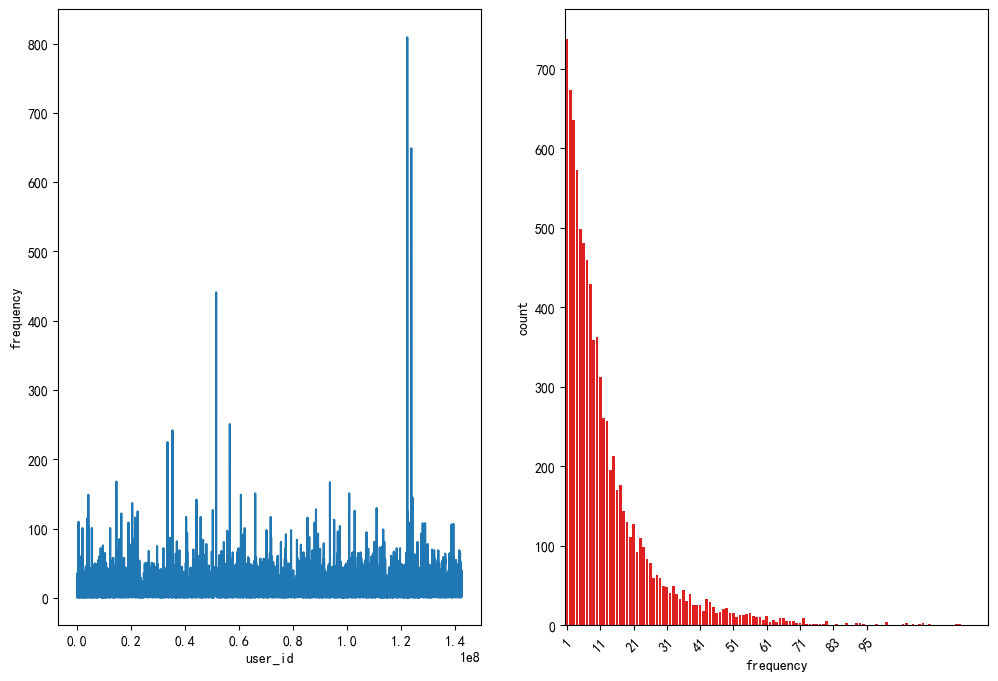

In [34]:
#提取购买frequency
data_user_buy = data[data['behavior_type'] == 4].groupby('user_id')['behavior_type'].count().reset_index().rename(columns={'behavior_type':'frequency'})
data_user_buy.head()
#可视化
fig = plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.lineplot(x = data_user_buy['user_id'], y = data_user_buy['frequency'])
plt.subplot(1,2,2)
sns.countplot(x= data_user_buy['frequency'],color='r')
plt.xticks(list(range(0,100,10)),rotation=45)
plt.show()

左图x轴为用户id，y轴为购买频率frequency，可见大部分人一个月内购买频次不超过50次，但少部分人购买次数超300，。右图x轴为frequency，y轴为数量统计，可见大部分人都购买频次集中在0-30次之内。考虑到实验周期包含了双十二大型促销活动，故可推断出，若无促销活动，则购买频次会更少。
### 3.1.2 用户分类

In [67]:
#创建透视表pivot_table(index = ,values = aggfunc = {})查看每个用户最近购买的时间r以及购买频次f
"""
index='user_id'
按 user_id 分组，每个用户生成一行统计结果。

values=['time', 'behavior_type']
指定要处理的列：time（行为时间）和 behavior_type（行为类型）。

aggfunc={'time': 'max', 'behavior_type': 'count'}
定义聚合函数：

对 time 列取 最大值（max），即用户最近一次购买的时间（Recency）。

对 behavior_type 列取 计数（count），即用户购买的总次数（Frequency）。
"""
rfm = data[data['behavior_type'] == 4].pivot_table(index = 'user_id',values = ['time','behavior_type'],aggfunc = {'time':'max','behavior_type':'count'})
rfm['time'] = pd.to_datetime(rfm['time'])
rfm

,behavior_type,time
user_id,,
4913,6,2014-12-16 12:00:00
6118,1,2014-12-17 21:00:00
7528,6,2014-12-13 19:00:00
7591,21,2014-12-13 09:00:00
12645,8,2014-12-14 19:00:00
...,...,...
142376113,1,2014-12-08 16:00:00
142412247,12,2014-12-15 10:00:00
142430177,5,2014-12-18 10:00:00


In [68]:
#转化出r，f列，根据实际业务对r，f列进行打分处理
#用户购买时间距离数据集中最近的一次购物时间间隔多少天，使用timedelta64（）,数值越大表示用户越久没活跃
rfm['R'] = -(rfm.time - rfm.time.max())/np.timedelta64(1,'D')#将 Timedelta 对象转换为以天为单位的数值（例如 3 days 转换为 3.0

rfm.rename(columns = {'behavior_type':'F'},inplace=True)

rfm.head()

#打分
#pandas.cut()将数据分类成不同区间值
#打分规则：间隔0-5天为5分，5-10天为4分，10-15天为3分，15-20天为2分，20天以上为1分，左闭右开
rfm['R_score'] = pd.cut(rfm['R'],bins=[0,5,10,15,20,30],labels=[5,4,3,2,1],right=False).astype(float)
# F_score打分规则：购物频次超过【0-10次】对应1分，【10，15次】对应2分...【35,900次】对应1分，不包含bins区间的最右边
rfm['F_score'] = pd.cut(rfm['F'],bins = [0,10,15,20,35,900],labels = [1,2,3,4,5],right = False).astype(float)
rfm

,F,time,R,R_score,F_score
user_id,,,,,
4913,6,2014-12-16 12:00:00,2.458333,5.0,1.0
6118,1,2014-12-17 21:00:00,1.083333,5.0,1.0
7528,6,2014-12-13 19:00:00,5.166667,4.0,1.0
7591,21,2014-12-13 09:00:00,5.583333,4.0,4.0
12645,8,2014-12-14 19:00:00,4.166667,5.0,1.0
...,...,...,...,...,...
142376113,1,2014-12-08 16:00:00,10.291667,3.0,1.0
142412247,12,2014-12-15 10:00:00,3.541667,5.0,2.0
142430177,5,2014-12-18 10:00:00,0.541667,5.0,1.0


关键逻辑
输入：一行数据 x，包含 R_score 和 F_score。

评分转二进制：

若评分 >=0，标记为 '1'（高价值）。

若评分 <0，标记为 '0'（低价值）。

组合标签：将 R_score 和 F_score 的二进制标签拼接（如 '11'）。

映射分层：根据组合标签返回对应的用户分层名称。




In [69]:
#根据评分刻画用户标签
"""
分层逻辑说明
标签组合	含义	业务意义
11	重要价值客户	最近活跃且购买频繁，需重点维护。
01	重要保持客户	购买频繁但近期不活跃，需防流失。
10	重要发展客户	近期活跃但购买少，可刺激复购。
00	重要挽留客户	不活跃且购买少，需召回或放弃。
"""
def rfm_func(x):
    level = x.apply(lambda x :'1' if x>=0 else '0') #此处赋值为str
    label = level.R_score + level.F_score
    d={
        '11':'重要价值客户',
        '01':'重要保持客户',
        '10':'重要发展客户',
        '00':'重要挽留用户'
    }
    result = d[label]
    return result
#x - x.mean() 确保评分以均值为基准，避免绝对阈值的主观性。
rfm['label'] = rfm[['R_score','F_score']].apply(lambda x :x-x.mean()).apply(rfm_func,axis =1)
rfm.head()


,F,time,R,R_score,F_score,label
user_id,,,,,,
4913,6,2014-12-16 12:00:00,2.458333,5.0,1.0,重要发展客户
6118,1,2014-12-17 21:00:00,1.083333,5.0,1.0,重要发展客户
7528,6,2014-12-13 19:00:00,5.166667,4.0,1.0,重要挽留用户
7591,21,2014-12-13 09:00:00,5.583333,4.0,4.0,重要保持客户
12645,8,2014-12-14 19:00:00,4.166667,5.0,1.0,重要发展客户


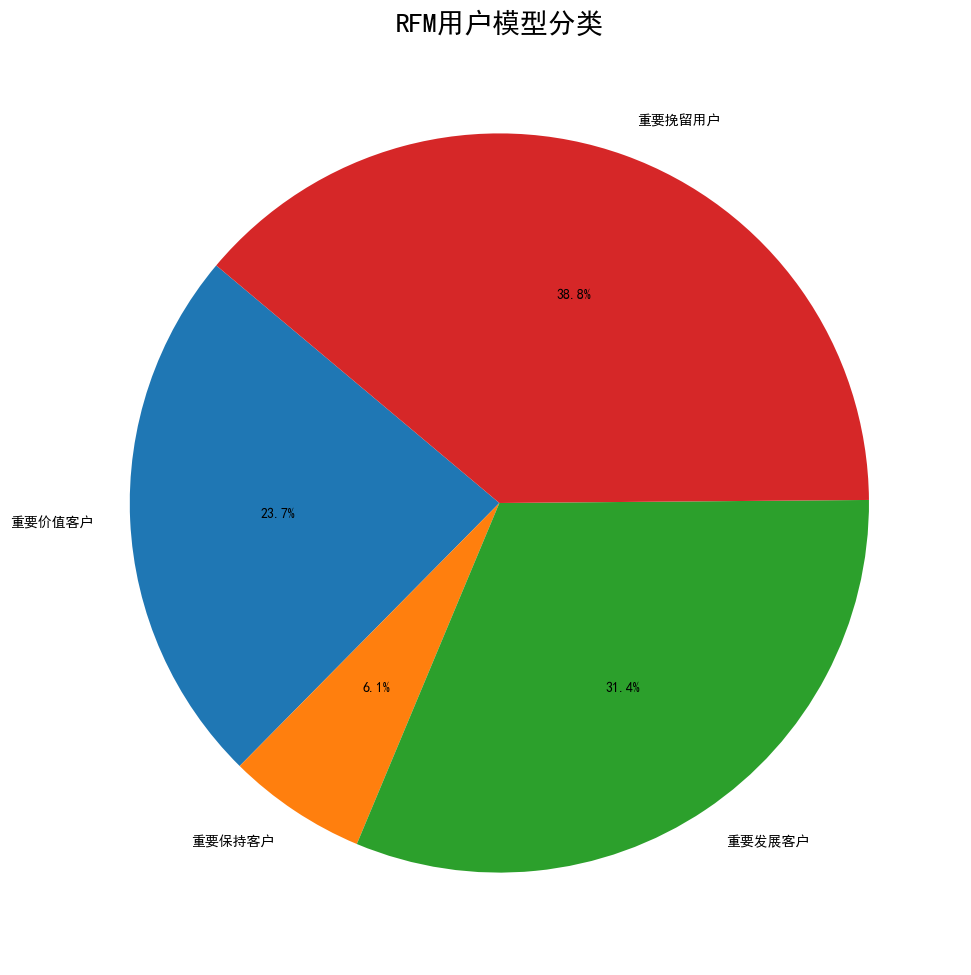

In [75]:
#饼图可视化
r = rfm.groupby('label')['label'].count()
r
rx = r.index.tolist()
ry = r.values.tolist()
rx,ry

plt.figure(figsize = (18,12))
plt.pie(ry,labels = rx,autopct = '%1.1f%%',shadow = False,startangle = 140)
plt.title('RFM用户模型分类',fontsize = 20)
plt.show()

根据RFM模型，共划分为四类客户，分别为重要价值客户, 重要保持客户, 重要发展客户, 重要挽留客户，其占比分别为：23.7%、6.1%、31.4%、38.8%。由于R、F的打分规则需综合考虑多方面因素，且数据集中缺乏M数据，因此本次分析结果仅供参考。

## 3.2 活跃度分析

活跃度是指用户在一定时间内在电商平台上的活跃程度。通过分析用户的活跃度，可以发现哪些用户是高活跃度用户，哪些用户是低活跃度用户。我们可以统计每个用户在一定时间内的活跃度，例如访问次数，然后将用户按照活跃度进行排序，得到活跃度排名前几的用户。同时，还可以分析活跃用户的转化情况和复购情况，以更加全面地评估用户的活跃度。
#### 3.2.1 活跃用户TOP50分析

Text(0.5, 1.0, 'Buy TOP50 User')

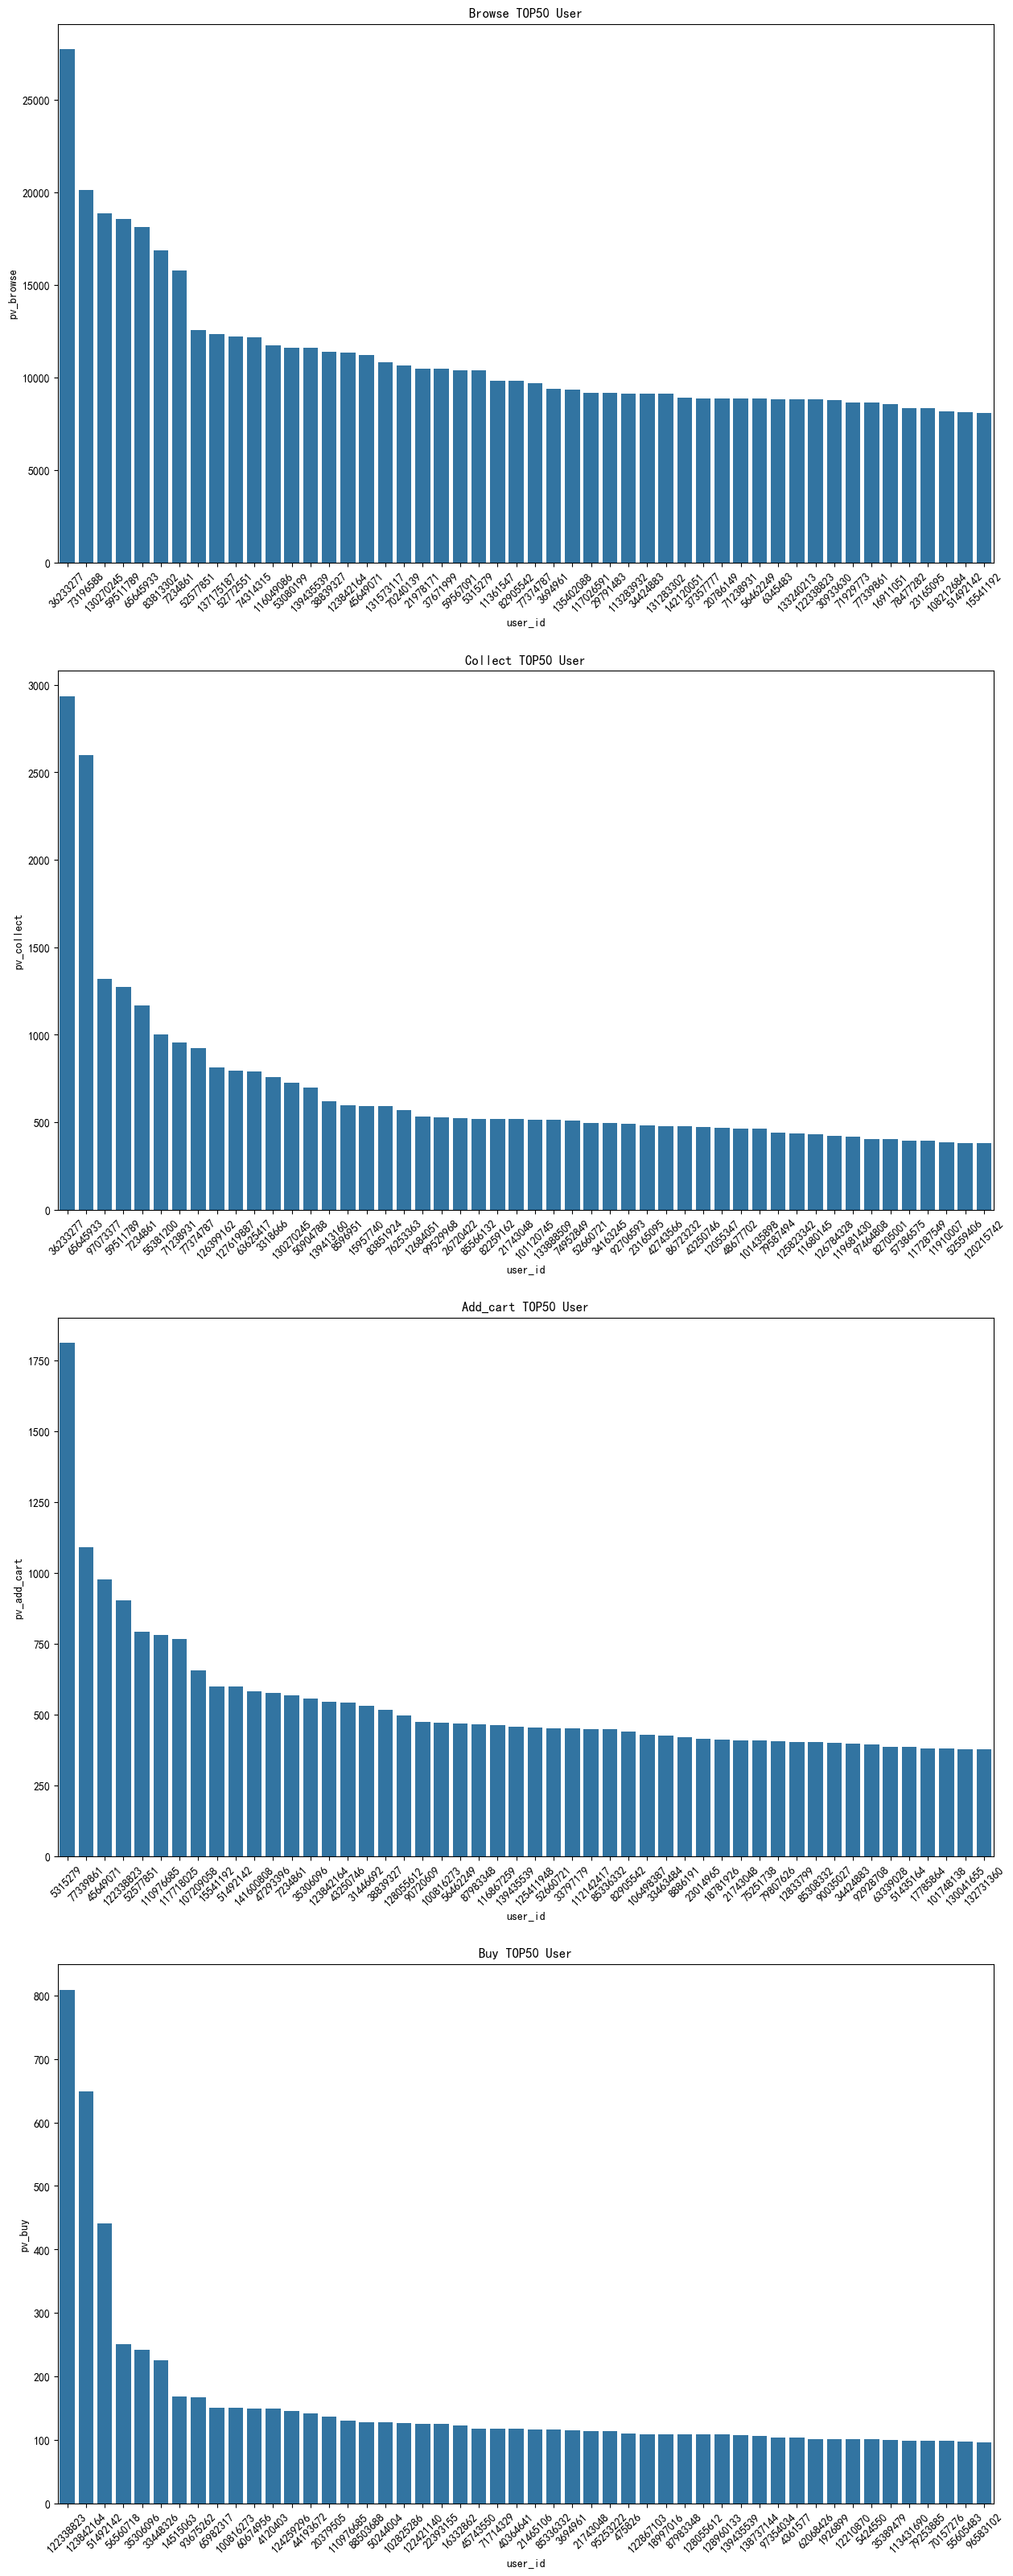

In [76]:
# 获取每种用户行为的TOP50活跃用户
top50_browse =  data[data.behavior_type == 1].groupby('user_id')['behavior_type'].count().reset_index().sort_values('behavior_type',ascending=False).rename(columns={'behavior_type':'pv_browse'}).head(50)
top50_collect = data[data.behavior_type == 2].groupby('user_id')['behavior_type'].count().reset_index().sort_values('behavior_type',ascending=False).rename(columns={'behavior_type':'pv_collect'}).head(50)
top50_add_cart = data[data.behavior_type == 3].groupby('user_id')['behavior_type'].count().reset_index().sort_values('behavior_type',ascending=False).rename(columns={'behavior_type':'pv_add_cart'}).head(50)
top50_buy = data[data.behavior_type == 4].groupby('user_id')['behavior_type'].count().reset_index().sort_values('behavior_type',ascending=False).rename(columns={'behavior_type':'pv_buy'}).head(50)
# 可视化
plt.figure(figsize=(15, 40))
plt.subplot(4, 1, 1)
# 绘制浏览量前50用户
sns.barplot(x='user_id',y='pv_browse',data=top50_browse,order=top50_browse['user_id'])
plt.xticks(rotation=45)
plt.title('Browse TOP50 User')
plt.subplot(4, 1, 2)
# 绘制收藏量前50用户
sns.barplot(x='user_id',y='pv_collect',data=top50_collect,order=top50_collect['user_id'])
plt.xticks(rotation=45)
plt.title('Collect TOP50 User')
plt.subplot(4, 1, 3)
# 绘制加购量前50用户
sns.barplot(x='user_id',y='pv_add_cart',data=top50_add_cart,order=top50_add_cart['user_id'])
plt.xticks(rotation=45)
plt.title('Add_cart TOP50 User')
plt.subplot(4, 1, 4)
# 绘制购买量前50用户
sns.barplot(x='user_id',y='pv_buy',data=top50_buy,order=top50_buy['user_id'])
# sns.set(style = 'darkgrid')
plt.xticks(rotation=45)
plt.title('Buy TOP50 User')

可以看到，一个月中活跃用户商品浏览量最高已达27720，前50均在8000以上；活跃用户商品收藏量最高已达2935，前50均在近400以上；活跃用户商品加购量最高已达1810，前50均在近400以上；活跃用户商品购买量最高已达809，前50均在近100以上。同时，图表显示每种用户的行为前10活跃度波动大，之后趋于平缓。
进一步分析浏览量、收藏量和加购量用户活跃度与购买量用户活跃度的关系

In [ ]:
#set&set取交集
print('在浏览量用户活跃度TOP50中，有'+str(len(set(top50_browse['user_id'])&set(top50_buy['user_id'])))+'名用户的购买量活跃度也是TOP50')
print('在收藏量用户活跃度TOP50中，有'+str(len(set(top50_collect['user_id'])&set(top50_buy['user_id'])))+'名用户的购买量活跃度也是TOP50')
print('在加购量用户活跃度TOP50中，有'+str(len(set(top50_add_cart['user_id'])&set(top50_buy['user_id'])))+'名用户的购买量活跃度也是TOP50')

在浏览量用户活跃度TOP50中，有5名用户的购买量活跃度也是TOP50
在收藏量用户活跃度TOP50中，有1名用户的购买量活跃度也是TOP50
在加购量用户活跃度TOP50中，有11名用户的购买量活跃度也是TOP50


可以看到，浏览量、收藏量和加购量前50的用户也很少出现在购买前50中，考虑到用户的总体数据（1w）远远大于抽样观察数据（50），为进一步观察用户浏览、收藏和加购行为与购买行为的相关性，可以考虑将观察数据提高至1000（总体数据的10%）。

In [78]:
top1000_browse =  data[data.behavior_type == 1].groupby('user_id')['behavior_type'].count().reset_index().sort_values('behavior_type',ascending=False).rename(columns={'behavior_type':'pv_browse'}).head(1000)
top1000_collect = data[data.behavior_type == 2].groupby('user_id')['behavior_type'].count().reset_index().sort_values('behavior_type',ascending=False).rename(columns={'behavior_type':'pv_collect'}).head(1000)
top1000_add_cart = data[data.behavior_type == 3].groupby('user_id')['behavior_type'].count().reset_index().sort_values('behavior_type',ascending=False).rename(columns={'behavior_type':'pv_add_cart'}).head(1000)
top1000_buy = data[data.behavior_type == 4].groupby('user_id')['behavior_type'].count().reset_index().sort_values('behavior_type',ascending=False).rename(columns={'behavior_type':'pv_buy'}).head(1000)
print('在浏览量用户活跃度TOP1000中，有'+str(len(set(top1000_browse['user_id'])&set(top1000_buy['user_id'])))+'名用户的购买量活跃度也是TOP1000')
print('在收藏量用户活跃度TOP1000中，有'+str(len(set(top1000_collect['user_id'])&set(top1000_buy['user_id'])))+'名用户的购买量活跃度也是TOP1000')
print('在加购量用户活跃度TOP1000中，有'+str(len(set(top1000_add_cart['user_id'])&set(top1000_buy['user_id'])))+'名用户的购买量活跃度也是TOP1000')
# print(len(set(top50_browse['user_id'])&set(top50_collect['user_id'])))

在浏览量用户活跃度TOP1000中，有387名用户的购买量活跃度也是TOP1000
在收藏量用户活跃度TOP1000中，有263名用户的购买量活跃度也是TOP1000
在加购量用户活跃度TOP1000中，有511名用户的购买量活跃度也是TOP1000


可以发现，用户浏览、收藏、加购的活跃度与用户购买活跃度成正相关，且用户加购量与购买量的正相关的比例系数最大。因此，想要提高购买转化率，可以重点关注加购活跃的用户。


### 3.2.2 活跃用户转化情况分析
对用户行为的活跃度分析，我们发现活跃度高的用户，其购买商品的意愿较强。从盈利的角度考虑，商家应重点考虑购买行为，因此为进一步研究活跃用户的转化情况，可以考虑从活跃用户与消费频次关系、付费活跃用户与消费频次的关系。
#### 3.2.2.1 活跃用户与消费频次关系

In [81]:
#给数据集中每一个用户赋值一个1，表示有操作
data['action'] = 1
data
data_active = data.groupby(['date','user_id','behavior_type'])['action'].count().reset_index()
data_active

,date,user_id,behavior_type,action
0,2014-11-18,4913,1,27
1,2014-11-18,4913,2,1
2,2014-11-18,7591,1,4
3,2014-11-18,12645,1,25
4,2014-11-18,54056,1,13
...,...,...,...,...
375435,2014-12-18,142430177,3,2
375436,2014-12-18,142430177,4,1
375437,2014-12-18,142450275,1,272
375438,2014-12-18,142450275,2,3


C:\Users\A\AppData\Local\Temp\ipykernel_4560\3855485360.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  k = data_active.groupby('date').apply(lambda x :x[x['behavior_type'] ==4]['action'].sum()/len(x['user_id'].unique()))


date
2014-11-18    0.588050
2014-11-19    0.574143
2014-11-20    0.546660
2014-11-21    0.481358
2014-11-22    0.577016
2014-11-23    0.525184
2014-11-24    0.526025
2014-11-25    0.545426
2014-11-26    0.562058
2014-11-27    0.577135
2014-11-28    0.519955
2014-11-29    0.515906
2014-11-30    0.566860
2014-12-01    0.597341
2014-12-02    0.552824
2014-12-03    0.589977
2014-12-04    0.565151
2014-12-05    0.521282
2014-12-06    0.508075
2014-12-07    0.507007
2014-12-08    0.520871
2014-12-09    0.525282
2014-12-10    0.483464
2014-12-11    0.467943
2014-12-12    1.975518
2014-12-13    0.513282
2014-12-14    0.522346
2014-12-15    0.554590
2014-12-16    0.560410
2014-12-17    0.544182
2014-12-18    0.544819
dtype: float64

k的中位数为： 0.5448192038893953


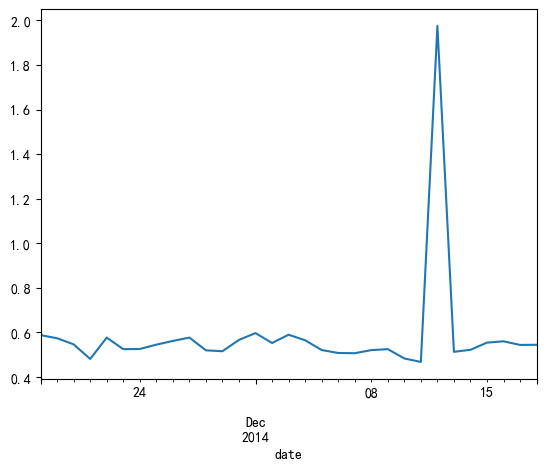

In [87]:
# 由y=kx，假设消费次数(Y)=相关系数(K)*活跃用户数(X)==》相关系数(K)=消费次数(Y)/活跃用户数(X)
# 计算每日的相关系数
k = data_active.groupby('date').apply(lambda x :x[x['behavior_type'] ==4]['action'].sum()/len(x['user_id'].unique()))
display(k)
k.plot()
print('k的中位数为：',k.median())

可以看到，K的中位数为0.5448，即活跃用户每天平均消费次数在0.5448次左右。双十二期间，活跃用户每天的消费次数波动较大，最高值接近2，是平时的4倍左右，表明活动对活跃用户购买频次的影响大。

#### 3.2.2.2 付费活跃用户与消费频次关系分析

In [88]:
# 按 date, user_id, behavior_type==4指标分组，并计算付费用户每日的操作次数
data_buy_active = data[data['behavior_type']==4].groupby(['date','user_id'])['action'].count().reset_index()
data_buy_active.head()

,date,user_id,action
0,2014-11-18,54056,1
1,2014-11-18,79824,2
2,2014-11-18,88930,2
3,2014-11-18,247543,5
4,2014-11-18,475826,3


In [89]:
# 由y=bx，假设消费次数(Y)=相关系数(B)*付费活跃用户数(X)==》相关系数(B)=消费次数(Y)/付费活跃用户数(X)
# 计算每日的相关系数
b=data_buy_active.groupby('date').apply(lambda x:x['action'].sum() / len(x['user_id'].unique()) ) 
b

C:\Users\A\AppData\Local\Temp\ipykernel_4560\516930364.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  b=data_buy_active.groupby('date').apply(lambda x:x['action'].sum() / len(x['user_id'].unique()) )


date
2014-11-18    2.423652
2014-11-19    2.439444
2014-11-20    2.320375
2014-11-21    2.271429
2014-11-22    2.530120
2014-11-23    2.330780
2014-11-24    2.248031
2014-11-25    2.313961
2014-11-26    2.402824
2014-11-27    2.403405
2014-11-28    2.231623
2014-11-29    2.331881
2014-11-30    2.357236
2014-12-01    2.359083
2014-12-02    2.284543
2014-12-03    2.289334
2014-12-04    2.328707
2014-12-05    2.223041
2014-12-06    2.253444
2014-12-07    2.320741
2014-12-08    2.204384
2014-12-09    2.413576
2014-12-10    2.230236
2014-12-11    2.226363
2014-12-12    3.913523
2014-12-13    2.245320
2014-12-14    2.312749
2014-12-15    2.313460
2014-12-16    2.285455
2014-12-17    2.302548
2014-12-18    2.310567
dtype: float64

b的中位数为：2.313460356484327


3.9135232229920454

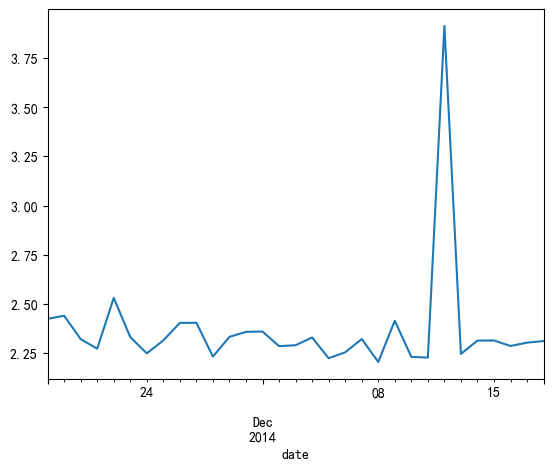

In [90]:
# 可视化
b.plot()
print('b的中位数为：'+ str(np.median(b)))
np.max(b)

可以看到，B的中位数为2.3134，即付费活跃用户每天平均消费次数在2.3134次左右。双十二期间，付费活跃用户每天的消费次数波动较大，最高值达到3.91。说明付费活跃用户买东西的频次高，对于平台的贡献也更大，因此需要进行重点关注和回馈。

### 3.2.3 活跃用户复购情况分析
一般，复购是指用户首购后的再次购买的行为。复购率简单来说，就是指购买过商品的顾客中，重复购买的顾客比例。即复购率 = 复购用户数 / 有购买行为的用户数。由于数据集提供的行为时间是精确到小时级别的，可能存在同一用户有两条及以上一模一样的购买数据。因此对同一个客户是否属于复购用户，需要定义一个相应的最小购买间隔周期。考虑到实际场景，为方便分析，此处将最小购买间隔周期设置为1天，即用户在一个月中有两天以上产生了购买行为。

In [93]:
#计算用户购买频次
data_buy = data[data['behavior_type'] == 4]
#基于date去重，得到的结果即为购物分布的天数
data_buy = data_buy.groupby('user_id')['date'].apply(lambda x:len(x.unique())).reset_index().rename(columns = {'date':'buy_count'})
data_buy

,user_id,buy_count
0,4913,5
1,6118,1
2,7528,6
3,7591,9
4,12645,4
...,...,...
8881,142376113,1
8882,142412247,7
8883,142430177,5
8884,142450275,8


In [101]:
#计算复购率
repeat_buy_ratio = data_buy[data_buy['buy_count']>1]['buy_count'].count()/data_buy['buy_count'].count()
repeat_buy_ratio = round(repeat_buy_ratio*100,3)
print(f'复购率：{repeat_buy_ratio}%')

复购率：87.171%


# 4. 商品分析
众所周知，商品是作为购物的一个重要组成部分。电商平台都需定期对商品进行多维度分析，比如针对商品的种类及其销量、各个不同商品销量、商品的复购情况等。本次分析数据含有商品标识、商品分类标识2个字段，其中商品数有2876847个、商品种类有8916种。因此可考虑4种用户行为的商品种类情况以及商品情况这两个角度，对商品进行一个初步分析。
## 4.1 商品种类情况分析

在商品种类总流量TOP100中，有100件商品种类的浏览量也是TOP100
在商品种类总流量TOP100中，有86件商品种类的收藏量也是TOP100
在商品种类总流量TOP100中，有81件商品种类的加购量也是TOP100
在商品种类总流量TOP100中，有70件商品种类的加购量也是TOP100

在商品种类浏览量TOP100中，有70件商品种类的购买量也是TOP100
在商品种类收藏量TOP100中，有61件商品种类的购买量也是TOP100
在商品种类加购量TOP100中，有82件商品种类的购买量也是TOP100

商品种类浏览量最高是：
      item_category  behavior_type  pv_item_category
3023           1863              1            371738
商品种类收藏量最高是：
      item_category  behavior_type  pv_item_category
3024           1863              2             10200
商品种类加购量最高是：
      item_category  behavior_type  pv_item_category
3025           1863              3              9309
商品种类购买量最高是：
       item_category  behavior_type  pv_item_category
10547           6344              4              2208


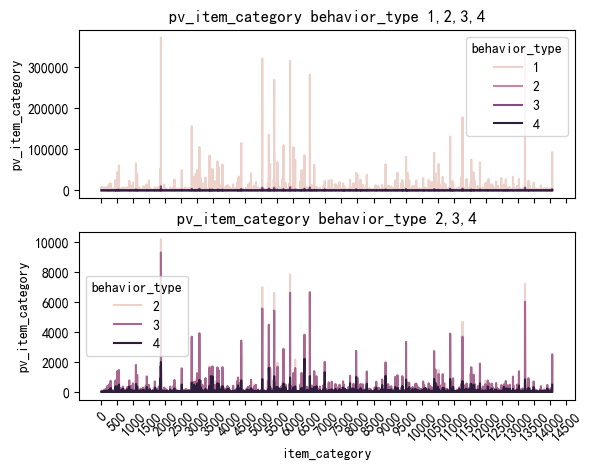

In [103]:
# 获取每种商品种类对应4种用户行为的访问量
pv_item_category = data.groupby(['item_category','behavior_type'])['user_id'].count().reset_index().rename(columns={'user_id':'pv_item_category'})
pv_item_category


# 可视化(浏览、收藏、加购物车、购买四种行为，分别用数字1、2、3、4表示),绘制每种商品类型的行为曲线
# 初步查看数据，可以发现浏览的用户行为明显远远高于收藏、加购及购买这三类用户行为，因此为方便观察可以分别绘制包含用户行为是浏览（behavior_type=1）和不包含浏览的浏览趋势图
fig, axes = plt.subplots(2,1,sharex=True)
axes[0] = sns.lineplot(x='item_category',y='pv_item_category',hue='behavior_type',data=pv_item_category,ax=axes[0])
axes[1] = sns.lineplot(x='item_category',y='pv_item_category',hue='behavior_type',data=pv_item_category[pv_item_category.behavior_type!=1],ax=axes[1])
plt.xticks(list(range(0,15000,500)), rotation=45)
axes[0].set_title('pv_item_category behavior_type 1,2,3,4')
axes[1].set_title('pv_item_category behavior_type 2,3,4')

# 获取TOP100：商品种类总流量、浏览量、收藏量、加购量和购买量
top100_pv_item_category =  data.groupby('item_category')['user_id'].count().reset_index().rename(columns={'user_id':'pv_item_category'}).sort_values('pv_item_category',ascending=False).head(100)
top100_pv_item_category_browse=pv_item_category[pv_item_category.behavior_type == 1].sort_values('pv_item_category',ascending=False).head(100)
top100_pv_item_category_collect=pv_item_category[pv_item_category.behavior_type == 2].sort_values('pv_item_category',ascending=False).head(100)
top100_pv_item_category_add_cart=pv_item_category[pv_item_category.behavior_type == 3].sort_values('pv_item_category',ascending=False).head(100)
top100_pv_item_category_buy=pv_item_category[pv_item_category.behavior_type == 4].sort_values('pv_item_category',ascending=False).head(100)

# 比较商品种类TOP100浏览量、收藏量、加购量和总流量及购买量的交集
print('在商品种类总流量TOP100中，有'+str(len(set(top100_pv_item_category['item_category'])&set(top100_pv_item_category_browse['item_category'])))+'件商品种类的浏览量也是TOP100')
print('在商品种类总流量TOP100中，有'+str(len(set(top100_pv_item_category['item_category'])&set(top100_pv_item_category_collect['item_category'])))+'件商品种类的收藏量也是TOP100')
print('在商品种类总流量TOP100中，有'+str(len(set(top100_pv_item_category['item_category'])&set(top100_pv_item_category_add_cart['item_category'])))+'件商品种类的加购量也是TOP100')
print('在商品种类总流量TOP100中，有'+str(len(set(top100_pv_item_category['item_category'])&set(top100_pv_item_category_buy['item_category'])))+'件商品种类的加购量也是TOP100'+'\n')

print('在商品种类浏览量TOP100中，有'+str(len(set(top100_pv_item_category_browse['item_category'])&set(top100_pv_item_category_buy['item_category'])))+'件商品种类的购买量也是TOP100')
print('在商品种类收藏量TOP100中，有'+str(len(set(top100_pv_item_category_collect['item_category'])&set(top100_pv_item_category_buy['item_category'])))+'件商品种类的购买量也是TOP100')
print('在商品种类加购量TOP100中，有'+str(len(set(top100_pv_item_category_add_cart['item_category'])&set(top100_pv_item_category_buy['item_category'])))+'件商品种类的购买量也是TOP100'+'\n')


print('商品种类浏览量最高是：\n'+str(top100_pv_item_category_browse.head(1)))
print('商品种类收藏量最高是：\n'+str(top100_pv_item_category_collect.head(1)))
print('商品种类加购量最高是：\n'+str(top100_pv_item_category_add_cart.head(1)))
print('商品种类购买量最高是：\n'+str(top100_pv_item_category_buy.head(1)))


可见，1w名用户在一个月4种用户行为针对的商品种类的是趋势一致的。即商品种类的浏览量越高，其对应的收藏、加购、购买量也越高。因此，为提高商品的转化，商家可重点关注和研究热门商品种类，如商品种类浏览量、收藏量、加购量都最高的item_category 1863和商品种类购买量最高的item_category 6344。此外，商品种类总流量主要受商品种类浏览量影响，分析用户行为商品种类流量TOP100，可以发现商品种类浏览-收藏-加购-购买的转化较高。

## 4.2 商品情况分析

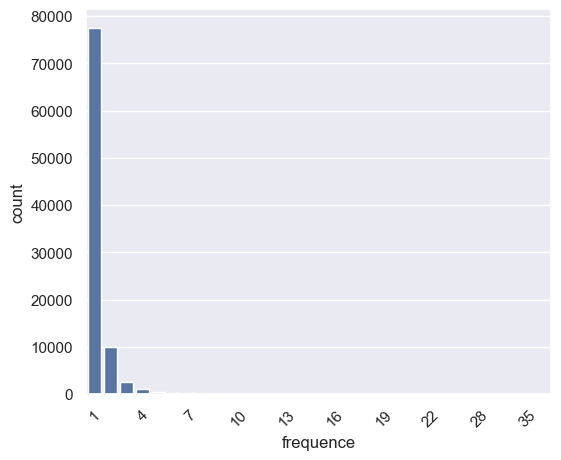

92753
一次性商品占比：83.65%


In [105]:
# 30天商品的购买频次数据
data_item_buy = data[data.behavior_type==4].groupby('item_id')['behavior_type'].count().reset_index().rename(columns={'behavior_type':'frequence'})

# 可视化
plt.figure(figsize=(6, 5))
# 绘制30日的购买频次分布图
sns.set(style = 'darkgrid')
sns.countplot(x=data_item_buy['frequence'])
plt.xticks(list(range(0,30,3)), rotation=45)
plt.show()
# 销售的商品数量（去重）
print(len(data[data.behavior_type==4]['item_id'].unique()))
print('一次性商品占比：'+str(round(len(data_item_buy[data_item_buy['frequence']==1])/len(data_item_buy)*100,2))+'%')

总共销售的商品数有2876847个，共有92753个不一样商品。我们能看到有77586多个商品只销售了一次，9910左右件商品销售了2次，一次性购买的商品高达83.65%，说明商品的销售主要是靠长尾商品，爆款商品并没有明显地带动销售。

# 总结
本项目对提供的数据集进行了初步分析，分别从流量分析、漏斗分析、用户价值分析、商品分析这四个不同的角度，对业务进行了浅析并给出了相应的推测和建议采取的措施。在上述分析的基础上，若有相应的数据支撑，还可以进一步挖掘更多的问题，如：

- 地域分析：对用户所在地域进行分析，找出用户的分布和偏好，以便更好地定位目标用户和制定地域营销策略。
- 用户画像分析：用户画像是指通过对用户的基本信息、行为特征、偏好等进行分析和整合，得到一个全面的用户形象描述。通过分析用户画像，可以发现哪些用户是高价值用户，哪些用户是低价值用户。我们可以通过收集用户的基本信息，例如性别、年龄、地域等，以及用户在电商平台上的行为特征，例如购买偏好、浏览偏好、搜索偏好等，来绘制用户画像。通过对不同类型的用户进行画像分析，可以为电商平台的营销策略制定提供有力支持，为业务发展提供更多的洞察。
- 营销效果分析：对各种营销活动的效果进行分析，例如促销活动、广告投放等，找出有效的营销方式和优化方案。


总之，通过淘宝用户购物行为数据的可视化分析，可以深入了解用户的需求和购买习惯，为业务发展提供更多的决策支持和业务洞察。